# Initialize a fresh test data dir

Includes horiz and vertical symmetry manipulations

In [3]:
import os
import shutil
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy import asarray
import h5py
from glob import glob
import json
import sys
import random
import PIL
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

In [4]:
np.random.seed(123)
tf.random.set_seed(123)

In [5]:
new_data = './dcai_gcb_01/dcai_gcb_01'

In [8]:
def run(fp_source, fp_dest, horiz=False, vert=False, rotate=False, show=False, enhance=1, contrast=1, resize=(32, 32)):
    image = Image.open(fp_source)
    image_out = Image.open(fp_source)
    
    if horiz:
        arr = asarray(image_out)
        arr = arr[:, ::-1]  # horizontal sym
        image_out = Image.fromarray(arr)
    if vert:
        arr = asarray(image_out)
        arr = arr[::-1, :]  # vert sym
        image_out = Image.fromarray(arr)
    
    if rotate:
        image_out = image_out.rotate(rotate, PIL.Image.NEAREST, 
                                     expand=False, 
                                     fillcolor='white')

    image_out = image_out.resize(resize)
    
    image_out = ImageEnhance.Sharpness(image_out)
    image_out = image_out.enhance(enhance)
    image_out = ImageEnhance.Contrast(image_out)
    image_out = image_out.enhance(contrast)
        
    if show:
        fig = plt.figure(figsize=(15, 5))
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)
        ax1.imshow(image, cmap='binary_r')
        ax2.imshow(image.resize(resize), cmap='binary_r')
        ax3.imshow(image_out, cmap='binary_r')
        plt.show()
        plt.close()

    if fp_dest is not None:
        image_out.save(fp_dest)

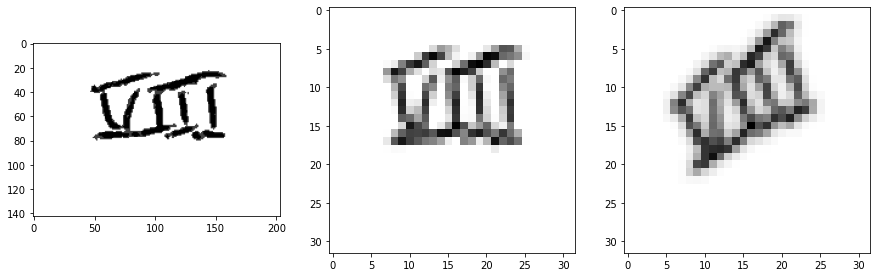

In [14]:
num = 'viii'
num_dir = new_data + '/train/{}/*.png'.format(num)
fps = [fp for fp in glob(num_dir) if '_vert' not in fp and '_horiz' not in fp]
fp = fps[100]
fp_out = None
run(fp, fp_out, vert=False, show=True, enhance=0.3, rotate=20)

In [28]:
fp

'./dcai_gcb_01/dcai_gcb_01/train/ix/af0235dc-ce5d-11eb-b317-38f9d35ea60f.png'

In [37]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    './dcai_gcb_01/dcai_gcb_01/train',
    labels="inferred",
    label_mode="categorical",
    class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
    shuffle=False,
    seed=123,
    batch_size=8,
    image_size=(256, 256),
)

Found 1545 files belonging to 10 classes.


In [38]:
train.file_paths.index('./dcai_gcb_01/dcai_gcb_01/train/ix/af0235dc-ce5d-11eb-b317-38f9d35ea60f.png')

1347

In [39]:
for i, x in enumerate(train.unbatch()):
    if i == train.file_paths.index('./dcai_gcb_01/dcai_gcb_01/train/ix/af0235dc-ce5d-11eb-b317-38f9d35ea60f.png'):
        break

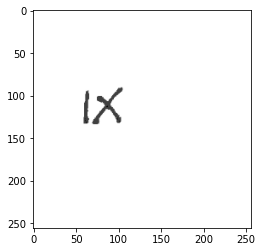

In [40]:
plt.imshow(x[0].numpy().astype(np.uint8))

In [5]:
horiz_sym = ['i', 'ii', 'iii', 'x', 'v']
vert_sym = ['i', 'ii', 'iii', 'x', 'ix']

for num in horiz_sym:
    num_dir = new_data + '/train/{}/*.png'.format(num)
    fps = [fp for fp in glob(num_dir) if '_vert' not in fp and '_horiz' not in fp]
    for fp in fps:
        fp_out = fp.replace('.png', '_horiz.png')
        run(fp, fp_out, horiz=True)
        
for num in vert_sym:
    num_dir = new_data + '/train/{}/*.png'.format(num)
    fps = [fp for fp in glob(num_dir) if '_vert' not in fp and '_horiz' not in fp]
    for fp in fps:
        fp_out = fp.replace('.png', '_vert.png')
        run(fp, fp_out, vert=True)

In [6]:
for num, target in (('vi', 'iv'), ('iv', 'vi')):
    num_dir = new_data + '/train/{}/*.png'.format(num)
    fps = glob(num_dir)
    for fp in fps:
        fp_out = fp.replace(num, target).replace('.png', '_horiz.png')
        run(fp, fp_out, horiz=True)

In [7]:
for n in numerals:
    num_pattern = new_data + '/*/{}/*.png'.format(n)
    fps = glob(num_pattern)
    n_required = 1000 - len(fps)
    print('Need {} more files for numeral "{}"'.format(n_required, n))

Need 240 more files for numeral "i"
Need 588 more files for numeral "ii"
Need 594 more files for numeral "iii"
Need 538 more files for numeral "iv"
Need 614 more files for numeral "v"
Need 406 more files for numeral "vi"
Need 753 more files for numeral "vii"
Need 744 more files for numeral "viii"
Need 544 more files for numeral "ix"
Need 501 more files for numeral "x"
